In [1]:
import numpy as np
import pandas as pd
import torch
import pickle
import matplotlib.pyplot as plt
from lpne.models import DcsfaNmf
import os, sys

MODEL_FILE = "/hpc/home/mk423/Anxiety/FullDataWork/Models/Final_mt_Model_500_epochs.pt"
DATA_PATH = "/work/mk423/csds-fit/"
PROJECT_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Projections/"
FIGURE_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/"
LPNE_PATH = "/hpc/home/mk423/Anxiety/FullDataWork/Preprocessing/lpne-data-analysis/"

model = torch.load(MODEL_FILE,map_location="cpu")
model.device="cpu"

sys.path.append(LPNE_PATH)

import data_tools

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/hpc/home/mk423/.local/lib/python3.7/site-packages/lpne/pipelines/__init__.py:14: UserWarning: Could not load lpne/pipelines/default_params.yaml!
  warnings.warn("Could not load lpne/pipelines/default_params.yaml!")


## Load Data

In [ ]:
X_psd, X_coh, X_gc, labels = data_tools.load_data(DATA_PATH + "csds_INT_TIME_fit.mat",
                                                  feature_list = ["power","coherence","granger"])

## Combine into common structure to experiment

In [6]:
X_psd, X_coh, X_gc, labels = data_tools.load_data(DATA_PATH + "csds_INT_TIME_fit.mat",
                                                  feature_list = ["power","coherence","granger"])

'saveFeatures_1.2'

In [3]:
np.unique(labels['windows']['mouse']).shape

(50,)

In [3]:
labels['windows'].keys()

dict_keys(['mouse', 'expDate', 'time', 'interval'])

In [5]:
dataDict = {
    "X_psd":X_psd,
    "X_coh":X_coh,
    "X_gc":X_gc,
    "y_mouse":np.array(labels['windows']['mouse']),
    "y_expDate":np.array(labels['windows']['expDate']),
    "y_time":np.array(labels['windows']['time']),
    "y_interval":np.array(labels['windows']['interval']),
    "labels":labels
}

#with open(DATA_PATH + "csds_fit_data.pkl","wb") as f:
#    pickle.dump(dataDict,f,protocol=4)

### Project

In [6]:
X = np.hstack((X_psd*10,X_coh,X_gc))
s = model.project(X)

coeffs = np.abs(model.classifier[0].weight[0].detach().cpu().numpy())
agg_score = s[:,:3] @ coeffs

## Save Score Projection

In [7]:
proj_dict = {
    "mouse":dataDict["y_mouse"],
    "expDate":dataDict["y_expDate"],
    "time":dataDict["y_time"],
    "interval":dataDict["y_interval"],
    "composite score":agg_score,
    "net 1 score":s[:,0],
    "net 2 score":s[:,1],
    "net 3 score":s[:,2],
}

df = pd.DataFrame.from_dict(proj_dict)
#df.to_csv(PROJECT_PATH + "csds_fit_Projection.csv")
df.head()

,mouse,expDate,time,interval,composite score,net 1 score,net 2 score,net 3 score
0,Mouse1381,121518,1,1,2.209222,0.066753,0.090855,0.055999
1,Mouse1381,121518,2,1,3.267579,0.082289,0.146613,0.023522
2,Mouse1381,121518,3,1,4.179533,0.109650,0.184278,0.045570
3,Mouse1381,121518,4,1,4.508023,0.130946,0.192510,0.021586
4,Mouse1381,121518,5,1,5.556240,0.137605,0.251038,0.031420


## Save Mean Scores

In [7]:
np.unique(df["interval"])

array([1, 2, 3])

In [8]:
mouse_list = []

comp_list_1 = []
comp_list_2 = []
comp_list_3 = []

net_1_list_1 = []
net_1_list_2 = []
net_1_list_3 = []

net_2_list_1 = []
net_2_list_2 = []
net_2_list_3 = []

net_3_list_1 = []
net_3_list_2 = []
net_3_list_3 = []

for mouse in np.unique(dataDict["y_mouse"]):
    
    mouse_list.append(mouse)
    
    comp_list_1.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==1)]["composite score"]))
    comp_list_2.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==2)]["composite score"]))
    comp_list_3.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==3)]["composite score"]))
    
    net_1_list_1.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==1)]["net 1 score"]))
    net_1_list_2.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==2)]["net 1 score"]))
    net_1_list_3.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==3)]["net 1 score"]))

    net_2_list_1.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==1)]["net 2 score"]))
    net_2_list_2.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==2)]["net 2 score"]))
    net_2_list_3.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==3)]["net 2 score"]))

    net_3_list_1.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==1)]["net 3 score"]))
    net_3_list_2.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==2)]["net 3 score"]))
    net_3_list_3.append(np.mean(df[np.logical_and(df["mouse"]==mouse,df["interval"]==3)]["net 3 score"]))
    
dict_means = {
    "mouse":mouse_list,
    
    "interval 1 mean comp score":comp_list_1,
    "interval 2 mean comp score":comp_list_2,
    "interval 3 mean comp score":comp_list_3,
    
    "interval 1 mean net 1 score":net_1_list_1,
    "interval 2 mean net 1 score":net_1_list_2,
    "interval 3 mean net 1 score":net_1_list_3,
    
    "interval 1 mean net 2 score":net_2_list_1,
    "interval 2 mean net 2 score":net_2_list_2,
    "interval 3 mean net 2 score":net_2_list_3,
    
    "interval 1 mean net 3 score":net_3_list_1,
    "interval 2 mean net 3 score":net_3_list_2,
    "interval 3 mean net 3 score":net_3_list_3,
    
}

df_means = pd.DataFrame.from_dict(dict_means)
#df_means.to_csv(PROJECT_PATH + "csds_fit_mean_scores.csv")
df_means.head()

,mouse,interval 1 mean comp score,interval 2 mean comp score,interval 3 mean comp score,interval 1 mean net 1 score,interval 2 mean net 1 score,interval 3 mean net 1 score,interval 1 mean net 2 score,interval 2 mean net 2 score,interval 3 mean net 2 score,interval 1 mean net 3 score,interval 2 mean net 3 score,interval 3 mean net 3 score
0,Mouse1381,3.409785,3.447243,3.762958,0.099652,0.099295,0.099468,0.143876,0.146426,0.165405,0.048098,0.045931,0.042569
1,Mouse1382,3.298723,3.606912,3.777740,0.082351,0.093076,0.094831,0.146763,0.159021,0.168084,0.062265,0.060535,0.064044
2,Mouse1383,3.698466,4.083897,3.962327,0.091606,0.097657,0.084008,0.165843,0.185271,0.185324,0.049784,0.052856,0.068378
3,Mouse1384,4.020345,4.172409,4.245042,0.093179,0.098468,0.088581,0.184322,0.190115,0.199905,0.047501,0.052589,0.061190
4,Mouse1391,3.392092,3.898128,3.599571,0.098858,0.112043,0.095338,0.143263,0.165844,0.156483,0.048502,0.049044,0.078272


In [9]:
control_mice = [
    'Mouse3203',
'Mouse3205',
'Mouse3215',
'Mouse3221',
'Mouse3223',
'Mouse3231',
'Mouse3235',
'Mouse3252',
'Mouse1381',
'Mouse1393',
'Mouse1403',
'Mouse1412',
'Mouse7181',
'Mouse7185',
'Mouse7191',
'Mouse7222',
]

defeat_mice = [
'Mouse3211',
'Mouse3212',
'Mouse3213',
'Mouse3214',
'Mouse1382',
'Mouse1392',
'Mouse1402',
'Mouse1404',
'Mouse1405',
'Mouse1413',
'Mouse7182',
'Mouse7192',
'Mouse7221',
'Mouse3201',
'Mouse3202',
'Mouse3204',
'Mouse3224',
'Mouse3233',
'Mouse3234',
'Mouse3251',
'Mouse3253',
'Mouse1383',
'Mouse1384',
'Mouse1391',
'Mouse1401',
'Mouse1411',
'Mouse7183',
'Mouse7184',
'Mouse7193',
'Mouse7194',
'Mouse7195',
'Mouse7202',
'Mouse7203',
'Mouse7204',
]

In [10]:
len(control_mice) + len(defeat_mice)

50

In [10]:
df_means.head()

,mouse,interval 1 mean comp score,interval 2 mean comp score,interval 3 mean comp score,interval 1 mean net 1 score,interval 2 mean net 1 score,interval 3 mean net 1 score,interval 1 mean net 2 score,interval 2 mean net 2 score,interval 3 mean net 2 score,interval 1 mean net 3 score,interval 2 mean net 3 score,interval 3 mean net 3 score
0,Mouse1381,3.409785,3.447243,3.762958,0.099652,0.099295,0.099468,0.143876,0.146426,0.165405,0.048098,0.045931,0.042569
1,Mouse1382,3.298723,3.606912,3.777740,0.082351,0.093076,0.094831,0.146763,0.159021,0.168084,0.062265,0.060535,0.064044
2,Mouse1383,3.698466,4.083897,3.962327,0.091606,0.097657,0.084008,0.165843,0.185271,0.185324,0.049784,0.052856,0.068378
3,Mouse1384,4.020345,4.172409,4.245042,0.093179,0.098468,0.088581,0.184322,0.190115,0.199905,0.047501,0.052589,0.061190
4,Mouse1391,3.392092,3.898128,3.599571,0.098858,0.112043,0.095338,0.143263,0.165844,0.156483,0.048502,0.049044,0.078272


In [12]:
df_means.columns

Index(['mouse', 'interval 1 mean comp score', 'interval 2 mean comp score',
       'interval 3 mean comp score', 'interval 1 mean net 1 score',
       'interval 2 mean net 1 score', 'interval 3 mean net 1 score',
       'interval 1 mean net 2 score', 'interval 2 mean net 2 score',
       'interval 3 mean net 2 score', 'interval 1 mean net 3 score',
       'interval 2 mean net 3 score', 'interval 3 mean net 3 score'],
      dtype='object')

In [25]:
from scipy.stats import ranksums

control_hc_means = []
for mouse in control_mice:
    control_hc_means.append(np.mean(df_means[df_means["mouse"]==mouse]["interval 1 mean comp score"]))
    
defeat_hc_means = []
for mouse in defeat_mice:
    defeat_hc_means.append(np.mean(df_means[df_means["mouse"]==mouse]["interval 1 mean comp score"]))
    
stat, pval = ranksums(control_hc_means,defeat_hc_means)

print(stat,pval)

-1.913347760857717 0.055703547228296374


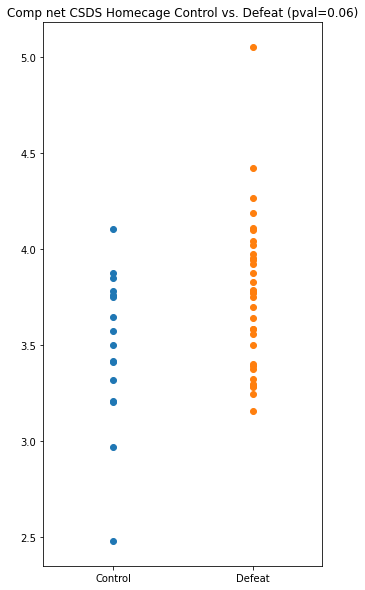

In [26]:
plt.figure(figsize=(5,10))

xa = np.zeros(len(control_hc_means))
xb = np.ones(len(defeat_hc_means))

ya = np.array(control_hc_means)
yb = np.array(defeat_hc_means)

plt.scatter(xa,ya)
plt.scatter(xb,yb)
plt.xlim([-.5,1.5])
plt.xticks(range(2),["Control","Defeat"])
plt.title("Comp net CSDS Homecage Control vs. Defeat (pval={:.2f})".format(pval))
plt.show()